# Biophysics Lab - 4/26/2019

## Author: Stephanie M. Yan

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Permutation test

### d. Calculate the absolute difference between the decay rates for the two columns in each data set.

In [2]:
d11, d12 = np.loadtxt("/Users/cmdb/Documents/Classes/Biophysics/GordusLab2/dwell1.txt", unpack=True, delimiter="\t")
d21, d22 = np.loadtxt("/Users/cmdb/Documents/Classes/Biophysics/GordusLab2/dwell2.txt", unpack=True, delimiter="\t")
d31, d32 = np.loadtxt("/Users/cmdb/Documents/Classes/Biophysics/GordusLab2/dwell3.txt", unpack=True, delimiter="\t")

# find lengths of columns in dataset
print(len(d11),len(d12))
print(len(d21),len(d22))
print(len(d31),len(d32))

def get_decay(d1, d2):

    min1 = min(d1)
    min2 = min(d2)
    mean1 = np.mean(d1)
    mean2 = np.mean(d2)
    l1 = 1/(mean1 - min1)
    l2 = 1/(mean2 - min2)
    
    diff = l1 - l2
    return(np.absolute(diff))
    
decay1 = get_decay(d11,d12)
decay2 = get_decay(d21,d22)
decay3 = get_decay(d31,d32)

10 10
100 100
1000 1000


### f. Use a for loop to randomly shuffle the master vector, calculate two new decay rates using the first and last halves of the shuffled vector, and increase the count k by one if the difference between these new decay rates is greater than the original difference of decay rates. Perform that 10,000 times.

In [3]:
# create a master vector of both columns using np.concatenate
vector1 = np.concatenate((d11,d12))
vector2 = np.concatenate((d21,d22))
vector3 = np.concatenate((d31,d32))

# calculate midway point and endpoint of vector
halfway = int(len(vector1)/2)
last = int(len(vector1))

def tenk_iter(vname, message, decay):
    
    print("Beginning 10,000 iterations...")
    k = 0

    for num in range(0,10000):

        if (num % 1000) == 0:
            print(message + str(num))

        np.random.shuffle(vname)
        halfway = int(len(vname)/2)
        last = int(len(vname))

        newdiff = get_decay(vname[0:halfway],vname[halfway:last])
        if newdiff > decay:
            k += 1
            
    print(k)
    print("p-value is " + str(k/10000))
    
tenk_iter(vector1, "Congrats!!! You've reached alternate reality #", decay1)
tenk_iter(vector2, "Number of memes created in this session: ", decay2)
tenk_iter(vector3, "Total count of boi-boi homophilic interactions: ", decay3)

Beginning 10,000 iterations...
Congrats!!! You've reached alternate reality #0
Congrats!!! You've reached alternate reality #1000
Congrats!!! You've reached alternate reality #2000
Congrats!!! You've reached alternate reality #3000
Congrats!!! You've reached alternate reality #4000
Congrats!!! You've reached alternate reality #5000
Congrats!!! You've reached alternate reality #6000
Congrats!!! You've reached alternate reality #7000
Congrats!!! You've reached alternate reality #8000
Congrats!!! You've reached alternate reality #9000
6662
p-value is 0.6662
Beginning 10,000 iterations...
Number of memes created in this session: 0
Number of memes created in this session: 1000
Number of memes created in this session: 2000
Number of memes created in this session: 3000
Number of memes created in this session: 4000
Number of memes created in this session: 5000
Number of memes created in this session: 6000
Number of memes created in this session: 7000
Number of memes created in this session: 80

## 2. Embedding

### a. Plot each cluster (each chunk of 1000 observations) separately in 3D on the same axes.

Text(0.5,0.92,'Plot of raw data')

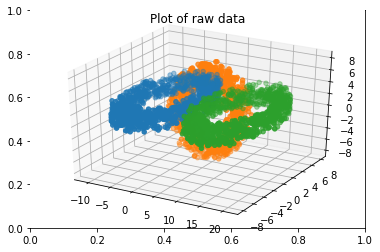

In [19]:
import time
from mpl_toolkits.mplot3d import Axes3D

col1, col2, col3 = np.loadtxt("/Users/cmdb/Documents/Classes/Biophysics/GordusLab2/Embed_input.txt", unpack=True, delimiter="\t")

fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(col1[0:1000],col2[0:1000],col3[0:1000])
ax.scatter(col1[1000:2000],col2[1000:2000],col3[1000:2000])
ax.scatter(col1[2000:3000],col2[2000:3000],col3[2000:3000])
ax.set_title("Plot of raw data")

### b. Use two components to perform the PCA, and then scatter plot each cluster separately in the same axes.

Total time: 0.0075719356536865234 seconds.


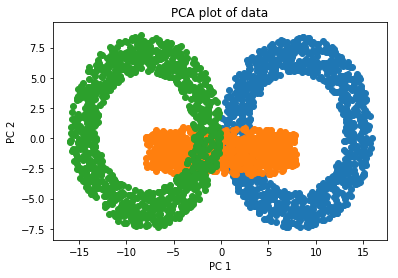

In [18]:
import pandas as pd
from sklearn.decomposition import PCA

start = time.time()
pca = PCA(n_components=2)
df = pd.read_table("/Users/cmdb/Documents/Classes/Biophysics/GordusLab2/Embed_input.txt", header=None)
fit = pca.fit_transform(df)
end = time.time()

print("Total time: " + str(end-start) + " seconds.")

fig, ax = plt.subplots()
ax.scatter(fit[:1000,0],fit[:1000,1])
ax.scatter(fit[1000:2000,0],fit[1000:2000,1])
ax.scatter(fit[2000:,0],fit[2000:,1])
ax.set_title("PCA plot of data")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2");

### c. Perform the tSNE 4 times with these four perplexity values: 2, 30, 100, 500, and scatter plot the clusters separately in the same axes.

Total time for perplexity 2: 37.78660774230957 seconds.
Total time for perplexity 30: 46.64657998085022 seconds.
Total time for perplexity 100: 90.00467205047607 seconds.
Total time for perplexity 500: 331.970095872879 seconds.


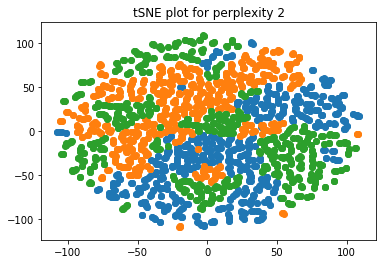

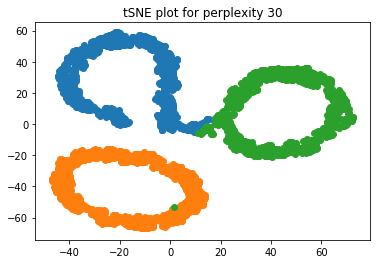

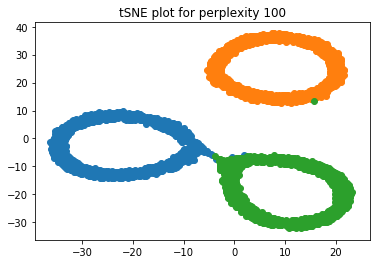

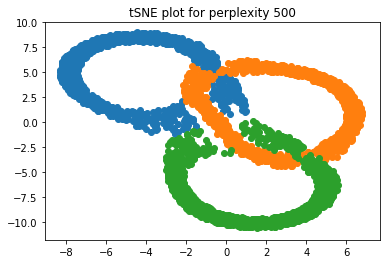

In [15]:
from sklearn.manifold import TSNE

def plot_tsne(perplex):

    start = time.time()
    tsne_embedded = TSNE(n_components=2,perplexity=perplex).fit_transform(df)
    end = time.time()

    print("Total time for perplexity " + str(perplex) + ": " + str(end-start) + " seconds.")

    fig, ax = plt.subplots()
    ax.scatter(tsne_embedded[:1000,0],tsne_embedded[:1000,1])
    ax.scatter(tsne_embedded[1000:2000,0],tsne_embedded[1000:2000,1])
    ax.scatter(tsne_embedded[2000:,0],tsne_embedded[2000:,1])
    ax.set_title("tSNE plot for perplexity " + str(perplex))
    
plot_tsne(2)
plot_tsne(30)
plot_tsne(100)
plot_tsne(500)

### d. Perform the UMAP 4 times with these four neighbor values: 2, 30, 100, 500, and scatter plot the clusters separately in the same axes.

/Users/cmdb/miniconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 881 separate connected components using meta-embedding (experimental)
  n_components


Total time for 2 neighbors: 3.590245246887207 seconds.
Total time for 30 neighbors: 5.734601974487305 seconds.
Total time for 100 neighbors: 8.14303183555603 seconds.
Total time for 500 neighbors: 11.179708003997803 seconds.


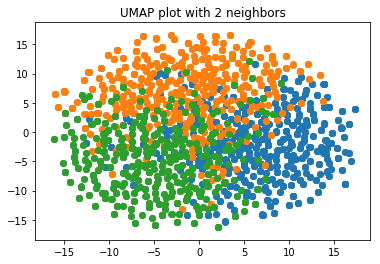

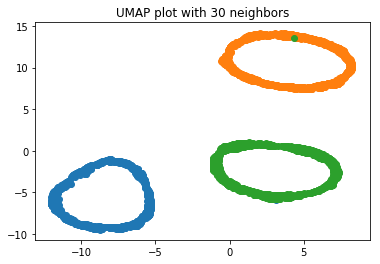

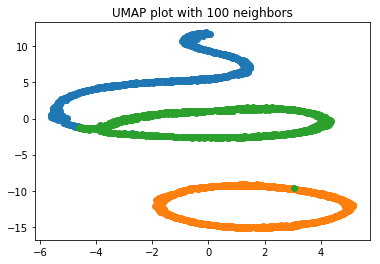

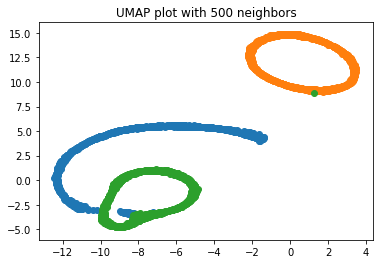

In [13]:
import umap

def plot_umap(neighbors):

    start = time.time()
    umap_embedding = umap.UMAP(n_neighbors=neighbors).fit_transform(df)
    end = time.time()

    print("Total time for " + str(neighbors) + " neighbors: " + str(end-start) + " seconds.")

    fig, ax = plt.subplots()
    ax.scatter(umap_embedding[:1000,0],umap_embedding[:1000,1])
    ax.scatter(umap_embedding[1000:2000,0],umap_embedding[1000:2000,1])
    ax.scatter(umap_embedding[2000:,0],umap_embedding[2000:,1])
    ax.set_title("UMAP plot with " + str(neighbors) + " neighbors")
    
plot_umap(2)
plot_umap(30)
plot_umap(100)
plot_umap(500)